In [79]:
!pip install Keras

# 1. Import libraries

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np
np.random.seed(5)
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import SGD

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Read and store data

In [82]:
data = pd.read_csv("/content/drive/MyDrive/UPM/Internship/Clinical_data_and_RNA_total_Features_PFS.csv")
# data=data.reset_index(drop=True)


In [83]:
data

,Unnamed: 0,Cohort,RNA_ID,Sex,Age,MSKCC,IMDC,Sarc,Rhab,Sarc_or_Rhab,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,1,P66432-07E-Run1_S20_L002,1,-1.0,0,1,0.0,1.0,1.0,...,31.34679,30.75900,31.42843,31.08705,32.71107,25.90385,31.67474,34.12401,34.32899,32.14828
1,1,1,P66451-08H-Run1_S26_L002,1,-1.0,1,1,0.0,0.0,0.0,...,30.87430,31.05250,31.80081,30.73640,32.28674,21.07951,32.48797,33.79261,34.00829,32.13593
2,2,1,P66291-06C-Run1_S26_L002,1,-1.0,0,0,0.0,0.0,0.0,...,31.25167,31.44371,31.51154,30.21717,32.46077,25.01312,32.26571,34.29307,34.64321,32.03359
3,3,1,EA595529,0,-1.0,0,0,-1.0,-1.0,-1.0,...,33.89329,31.52823,31.37139,31.67742,32.38818,27.13897,32.69528,33.70234,32.16150,33.38502
4,4,1,P66425-10B-Run1_S14_L001,1,-1.0,1,1,0.0,0.0,0.0,...,31.34078,31.20506,30.44983,30.39079,31.93868,21.07951,31.34827,34.48915,33.57104,30.52599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,1,EA595597,0,-1.0,1,1,0.0,0.0,0.0,...,31.79512,29.54665,30.23505,30.31045,31.37708,26.69069,32.42070,34.35072,34.08129,32.67870
177,177,1,P66282-01G-Run1_S3_L001,1,-1.0,1,0,0.0,1.0,1.0,...,31.35633,30.63953,30.91397,30.80688,31.80574,21.07951,31.98301,34.71904,33.83702,32.75734
178,178,1,P66287-07B-Run1_S2_L001,0,-1.0,1,1,0.0,0.0,0.0,...,31.42083,30.26672,31.70032,30.50743,31.69798,30.53831,32.88405,33.83220,35.05889,32.80163
179,179,1,P66291-01B-Run1_S2_L001,0,-1.0,1,1,0.0,0.0,0.0,...,31.12877,31.52142,30.97558,30.63280,31.89907,27.25043,32.08933,34.30456,33.96936,32.18444


In [84]:
data = data.iloc[:,16:43911] 

In [85]:
data

,Target,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,NR,20.980824,37.282634,32.394764,28.870768,31.258914,35.951604,26.832775,26.323583,20.980667,...,31.34679,30.75900,31.42843,31.08705,32.71107,25.90385,31.67474,34.12401,34.32899,32.14828
1,NR,20.980824,38.258157,30.965497,23.859635,32.949781,37.521337,27.417967,24.845262,20.980667,...,30.87430,31.05250,31.80081,30.73640,32.28674,21.07951,32.48797,33.79261,34.00829,32.13593
2,NR,20.980824,38.188964,31.930133,28.485719,26.168791,36.015727,25.608517,28.564779,20.980667,...,31.25167,31.44371,31.51154,30.21717,32.46077,25.01312,32.26571,34.29307,34.64321,32.03359
3,NR,21.026286,36.605262,32.546553,26.604504,31.235049,36.850599,24.398145,27.577558,20.976688,...,33.89329,31.52823,31.37139,31.67742,32.38818,27.13897,32.69528,33.70234,32.16150,33.38502
4,NR,20.980824,35.832174,33.406547,24.918545,32.777268,38.545393,21.357557,24.892587,20.980667,...,31.34078,31.20506,30.44983,30.39079,31.93868,21.07951,31.34827,34.48915,33.57104,30.52599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,R,21.026286,37.564794,31.436146,28.223177,29.279089,37.581987,26.919700,26.091240,20.976688,...,31.79512,29.54665,30.23505,30.31045,31.37708,26.69069,32.42070,34.35072,34.08129,32.67870
177,R,20.980824,36.103756,31.742840,28.947436,27.082321,38.180753,24.669716,20.860170,20.980667,...,31.35633,30.63953,30.91397,30.80688,31.80574,21.07951,31.98301,34.71904,33.83702,32.75734
178,R,20.980824,36.899816,24.438962,21.286965,34.362365,36.996222,21.357557,20.860170,20.980667,...,31.42083,30.26672,31.70032,30.50743,31.69798,30.53831,32.88405,33.83220,35.05889,32.80163
179,R,20.980824,36.500470,30.264581,25.252020,33.043464,36.728673,27.583360,26.983274,20.980667,...,31.12877,31.52142,30.97558,30.63280,31.89907,27.25043,32.08933,34.30456,33.96936,32.18444


# 3. Data pre-processing


### 3.3 Normalize data (each column to the max value)

In [86]:
for i in data[:0].drop(['Target'], axis=1):
    # print(i)
    data[i] = data[i] /data[i].abs().max() 


In [87]:
data

,Target,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,NR,0.714991,0.932338,0.921685,0.918377,0.868816,0.920867,0.900190,0.777727,0.995452,...,0.923409,0.924559,0.959142,0.972976,0.978546,0.848241,0.937432,0.942274,0.971082,0.945915
1,NR,0.714991,0.956733,0.881020,0.758973,0.915812,0.961075,0.919822,0.734050,0.995452,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552
2,NR,0.714991,0.955003,0.908466,0.906128,0.727340,0.922510,0.859118,0.843943,0.995452,...,0.920607,0.945140,0.961678,0.945750,0.971058,0.819073,0.954922,0.946943,0.979970,0.942541
3,NR,0.716540,0.915399,0.926004,0.846287,0.868152,0.943894,0.818512,0.814775,0.995264,...,0.998424,0.947680,0.957401,0.991454,0.968886,0.888686,0.967635,0.930631,0.909769,0.982305
4,NR,0.714991,0.896066,0.950472,0.792657,0.911017,0.987305,0.716506,0.735448,0.995452,...,0.923232,0.937966,0.929277,0.951184,0.955440,0.690264,0.927770,0.952357,0.949641,0.898182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,R,0.716540,0.939394,0.894411,0.897777,0.813788,0.962628,0.903106,0.770862,0.995264,...,0.936616,0.888118,0.922722,0.948670,0.938640,0.874007,0.959509,0.948534,0.964075,0.961522
177,R,0.714991,0.902858,0.903137,0.920815,0.752731,0.977965,0.827623,0.616311,0.995452,...,0.923690,0.920968,0.943441,0.964207,0.951463,0.690264,0.946555,0.958705,0.957165,0.963836
178,R,0.714991,0.922765,0.695329,0.677136,0.955074,0.947624,0.716506,0.616311,0.995452,...,0.925590,0.909762,0.967439,0.954835,0.948239,1.000000,0.973222,0.934216,0.991729,0.965139
179,R,0.714991,0.912778,0.861078,0.803264,0.918416,0.940771,0.925370,0.797217,0.995452,...,0.916987,0.947475,0.945322,0.958759,0.954255,0.892336,0.949702,0.947260,0.960909,0.946979


In [88]:
data.to_csv("/content/drive/MyDrive/UPM/data_standarized.csv")

# 4. Data split into Train and Test

In [89]:
#144 NR
#167 R
X_train, X_test = train_test_split(data, test_size=0.2, random_state=125)
X_train = X_train.drop(['Target'], axis=1)
X_train = X_train.values

Y_test = X_test['Target']
X_test = X_test.drop(['Target'], axis=1)
X_test = X_test.values

In [90]:
print(X_train)

[[0.71694061 0.87589736 0.77157163 ... 0.94260617 0.97703959 0.94053507]
 [0.71499066 0.92372434 0.87674569 ... 0.94166456 0.95621658 0.94721745]
 [0.71499066 0.92328074 0.87560615 ... 0.94956774 0.94415563 0.95044962]
 ...
 [0.71499066 0.89721919 0.80781399 ... 0.95826646 0.94562913 0.95655529]
 [0.71694061 0.91377997 0.91250475 ... 0.97155726 0.95168124 0.9087562 ]
 [0.71653993 0.92027979 0.88738279 ... 0.95222717 0.95548252 0.93984862]]


In [91]:
np.savetxt("/content/drive/MyDrive/UPM/input_data.csv", X_train, delimiter=',')

# 5. Autoencoder model creation

In [92]:
dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))
#15-65 neuronas por llayer y entre 1 y 4 layers

encoder = Dense(438, activation='relu')(capa_entrada) #relu for encoder sigmoid for decoders
encoder = Dense(43, activation='relu')(encoder)
decoder = Dense(438, activation='sigmoid')(encoder)
decoder = Dense(43893 , activation='sigmoid')(decoder)
autoencoder = Model(inputs=capa_entrada, outputs=decoder)


### 5.1. Loss function definition

In [93]:
autoencoder.compile(optimizer='adam', loss='mse')

# 6. Autoencoder model training

In [94]:
nits = 200 #1000-1500
tam_lote = 32

autoencoder.fit(X_train, X_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test,X_test), verbose=1)

Epoch 1/200
5/5 [==============================] - 3s 412ms/step - loss: 0.0926 - val_loss: 0.0357
Epoch 2/200
5/5 [==============================] - 2s 410ms/step - loss: 0.0195 - val_loss: 0.0062
Epoch 3/200
5/5 [==============================] - 2s 394ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 4/200
5/5 [==============================] - 2s 363ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/200
5/5 [==============================] - 2s 353ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 6/200
5/5 [==============================] - 2s 358ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/200
5/5 [==============================] - 2s 354ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/200
5/5 [==============================] - 2s 352ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/200
5/5 [==============================] - 2s 349ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/200
5/5 [==============================] - 2s 350ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/

# 7. Model validation

### 7.1 Generate prediction

In [95]:
X_pred = autoencoder.predict(X_test)

### 7.2. Mean squared error (MSE) calculation

In [96]:
MSE = np.mean(np.power(X_test-X_pred,2), axis=1)

In [97]:
print(type(Y_test))
Y_test=Y_test.to_numpy()
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [98]:
Y_test=np.array(Y_test, dtype=bool)


In [99]:
len(Y_test)

37

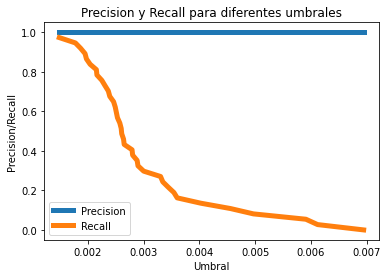

In [100]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
precision, recall, umbral = precision_recall_curve(Y_test, MSE)

plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [101]:
threshold = 0.002
Y_pred = [1 if e > threshold else 0 for e in MSE]

In [102]:
import collections
match = collections.Counter(Y_pred)[1]
print('Final accuracy on the testing dataset: ' + str(match/len(Y_pred)))

Final accuracy on the testing dataset: 0.8648648648648649


In [103]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[ 0  0]
 [ 5 32]]


In [104]:
np.savetxt("/content/drive/MyDrive/UPM/output_data.csv", X_train, delimiter=',')